In [1]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
#from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import model_selection

In [2]:
#Loading the train and test dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
X = train_data.drop('Claim',1)
y = train_data['Claim'].copy()

In [4]:
X_full = X.append(test_data)
X_full.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [5]:
# Percentage missing values
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_data = missing_datas(X_full)
print(missing_data)

                      Total  Percent
Gender                45009   71.201
Age                       0    0.000
Commision (in value)      0    0.000
Net Sales                 0    0.000
Destination               0    0.000
Duration                  0    0.000
Product Name              0    0.000
Distribution Channel      0    0.000
Agency Type               0    0.000
Agency                    0    0.000
ID                        0    0.000


In [6]:
#dropping the feature with high missing values
X_full = X_full.drop('Gender',1)
test_data = test_data.drop('Gender',1)
X = X.drop('Gender',1)

In [7]:
#Check numeric and categorical features

# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=['number']).columns
    return categorical_col

#Check numeric columns
numeric_columns = numeric_features(X_full)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

#Check categorical columns
categorical_columns = categorical_features(X_full)
print("Categorical Features:")
print(categorical_columns)

Numeric Features:
Index(['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')
Categorical Features:
Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')


In [8]:
identifiers = test_data['ID'].copy()

#Drop irrelevant features
X = X.drop('ID',1)
X_full = X_full.drop('ID',1)
test_data = test_data.drop('ID',1)

#Recalculating numeric & categorical features
numeric_columns = numeric_features(X_full)
categorical_columns = categorical_features(X_full)

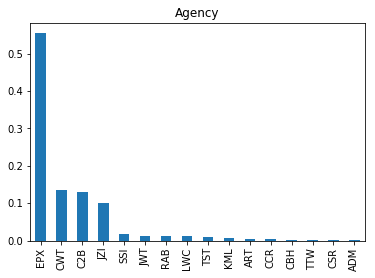

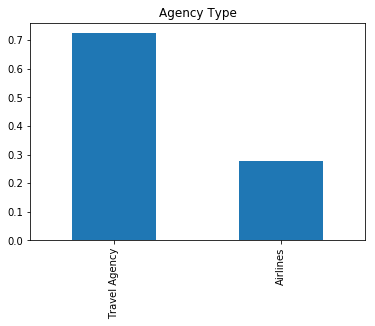

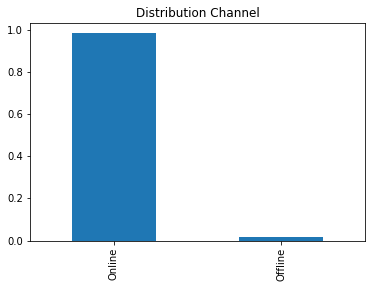

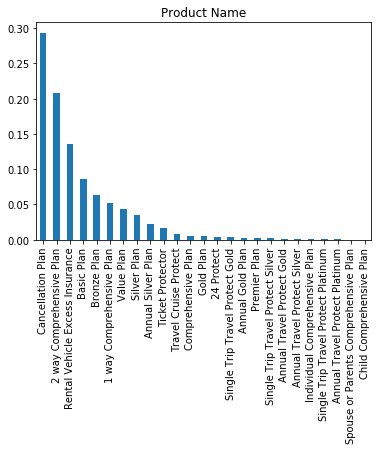

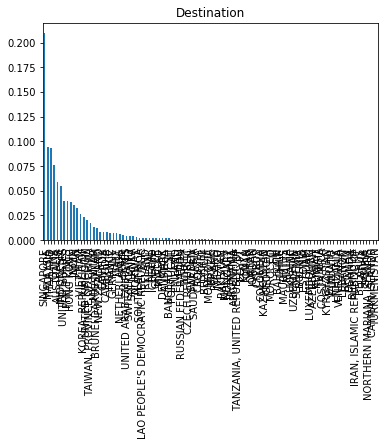

In [9]:
# Function to perform univariate analysis of categorical columns
def plot_categorical_columns(dataframe):
    categorical_columns = categorical_features(dataframe)
    dataframe = dataframe[categorical_columns]
    for i in dataframe:
        plt.title(i)
        dataframe[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()

plot = plot_categorical_columns(X_full)

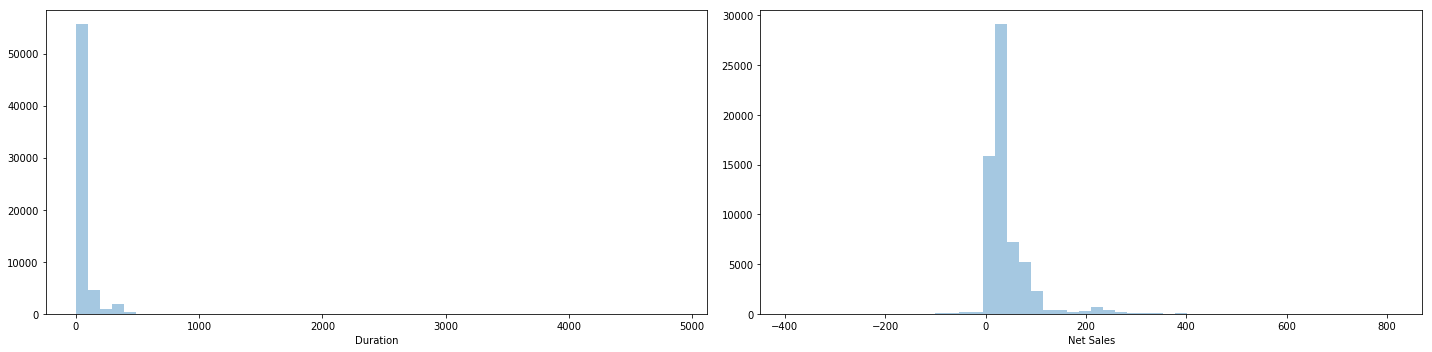

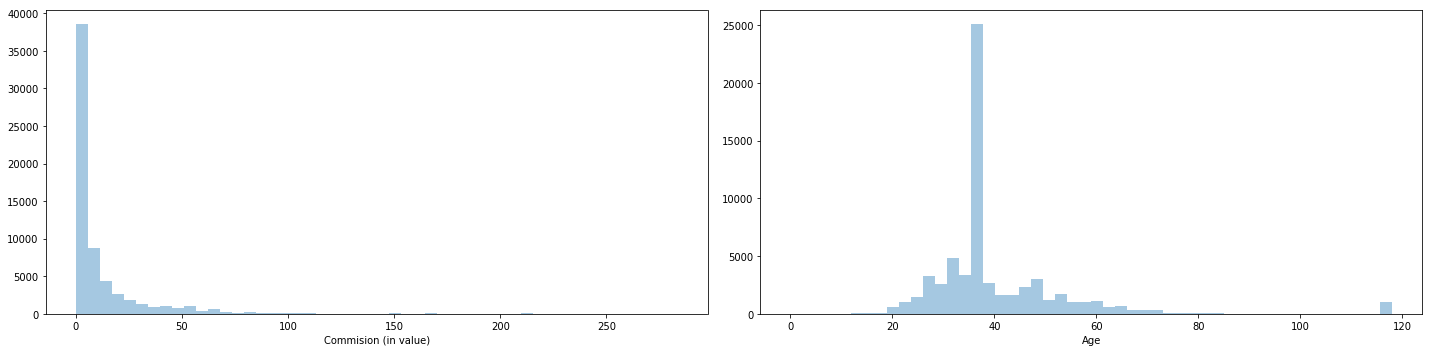

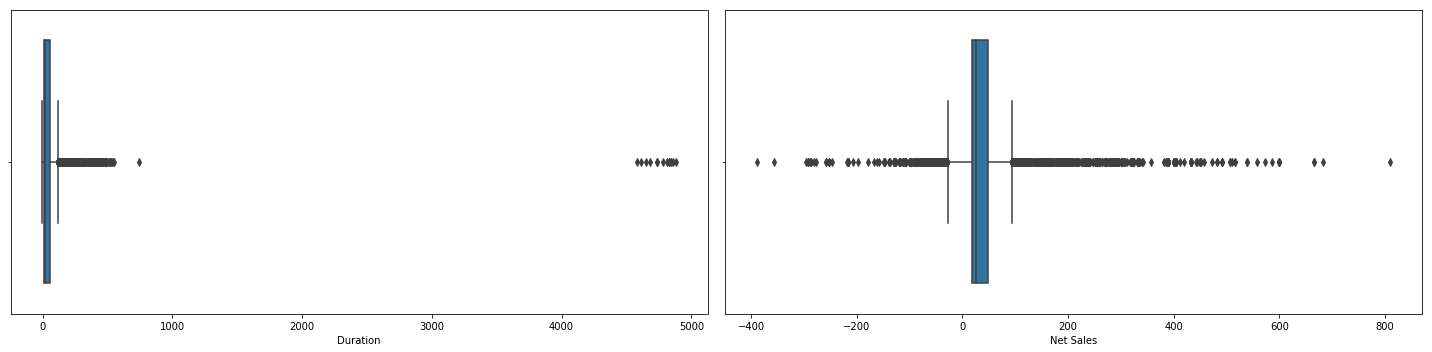

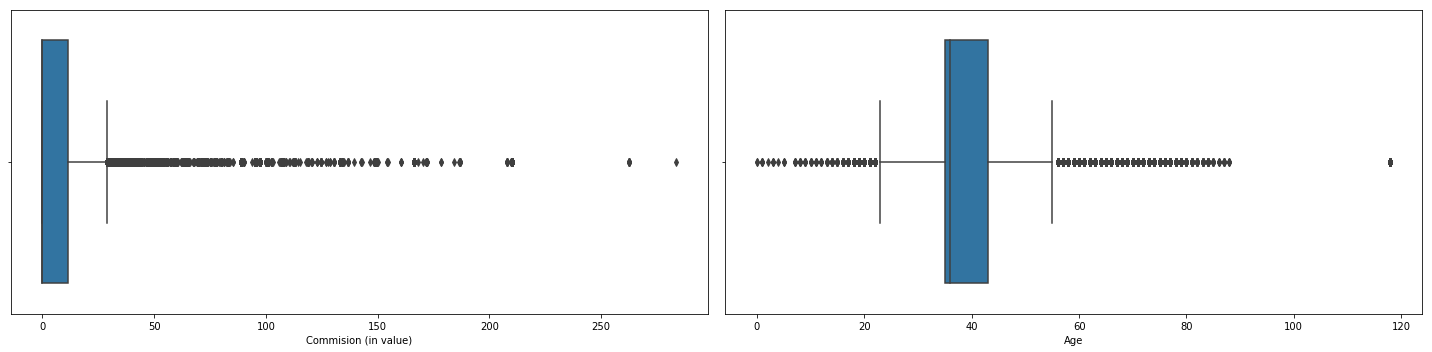

In [10]:
# Function to plot histograms & Boxplots
def plot_continuous_columns(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(20,5))
            plt.subplot(121)
            sns.distplot(dataframe[numeric_columns[i]], kde=False)
            plt.subplot(122)            
            sns.distplot(dataframe[numeric_columns[i+1]], kde=False)
            plt.tight_layout()
            plt.show()

        else:
            sns.distplot(dataframe[numeric_columns[i]], kde=False)

def plot_box_plots(dataframe):
    numeric_columns = numeric_features(dataframe)
    dataframe = dataframe[numeric_columns]
    
    for i in range(0,len(numeric_columns),2):
        if len(numeric_columns) > i+1:
            plt.figure(figsize=(20,5))
            plt.subplot(121)
            sns.boxplot(dataframe[numeric_columns[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[numeric_columns[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[numeric_columns[i]])

plot_continuous_columns(X_full)          
plot_box_plots(X_full)

In [11]:
#Removing outliers from Train data
#X diverges from X_full and train_data here for numerical features 
#but care must be taken to check transformations and scaling effects on all data

X = X[X['Duration']>0]
X = X[X['Duration']<366] 
X = X[X['Age']<=100]

y = y.iloc[X.index]

Highly Correlated Variables


Series([], dtype: float64)

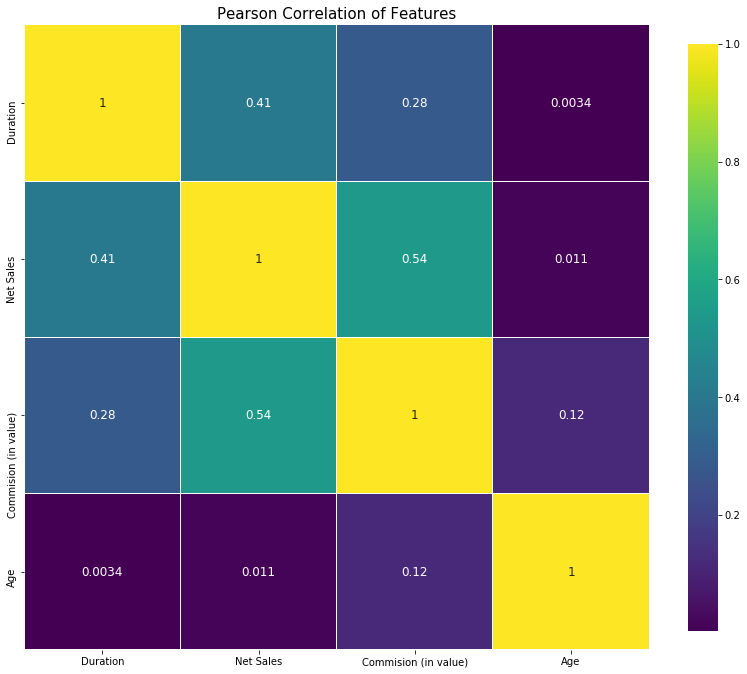

In [12]:
#correlation heatmap of Numeric Features
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(X)

In [13]:
# Dataset Preparation for Baseline Models

# Characteristics of Baseline models:
#   Encoding - Label Encomding
#   Charateristic Features - Unbinned
#   Numeric Features - Untransformed and Unscaled
#   Sampling - No Under/Over Sampling
#   Hyper parameters - No Grid Search
#   Baseline models / Estimators - Logistic Regression, Decision Tree, Random Forest
#   Ensembling - No Ensembling
#   Boosting - No boosting

#Datasets
X_1 = X.copy()
y_1 = y.copy()    

#Label Encoding
le = LabelEncoder()
for cols in categorical_columns:
    X_full[cols] = le.fit(X_full[cols])
    X_1[cols] = le.transform(X_1[cols])

#Train test split
X_train,X_test,y_train, y_test = train_test_split(X_1,y_1,test_size=0.3,random_state=0)
smote = SMOTE()
X_train,y_train = smote.fit_sample(X_train,y_train)

In [14]:
#Functions for models
def model(xtrain, xtest, ytrain, ytest, model):
    '''
    Performs model training and tests using ROC-AUC and precision 
    returns precision score
    '''
    model.fit(xtrain, ytrain)
    y_scores = model.predict(xtest)
    precision = precision_score(ytest, y_scores)
    confusion = confusion_matrix(ytest, y_scores)
    print(classification_report(ytest,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_scores)
    print('Precision Score:',precision_score(ytest, y_scores))
    print('Recall Score:',recall_score(y_test,y_scores))
    print('Roc Auc Score:',roc_auc_score(ytest,y_scores))
    print('Confusion Matrix:\n',confusion)
    
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return precision

C:\Users\safik\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc_auc 0.7304031044008242
Accuracy score for model :- 0.8317801836371111
confusion matrix for model :-, [[12020  2384]
 [   71   119]]
classification report for model :-               precision    recall  f1-score   support

           0       0.99      0.83      0.91     14404
           1       0.05      0.63      0.09       190

    accuracy                           0.83     14594
   macro avg       0.52      0.73      0.50     14594
weighted avg       0.98      0.83      0.90     14594

Precision score for model :- 0.047542948461845785


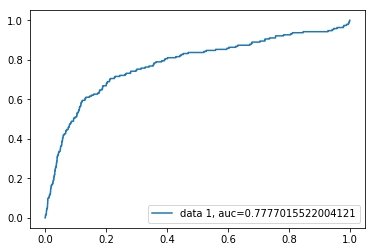

C:\Users\safik\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


roc_auc 0.5199980999429983
Accuracy score for model :- 0.9751952857338633
confusion matrix for model :-, [[14222   182]
 [  180    10]]
classification report for model :-               precision    recall  f1-score   support

           0       0.99      0.99      0.99     14404
           1       0.05      0.05      0.05       190

    accuracy                           0.98     14594
   macro avg       0.52      0.52      0.52     14594
weighted avg       0.98      0.98      0.98     14594

Precision score for model :- 0.052083333333333336


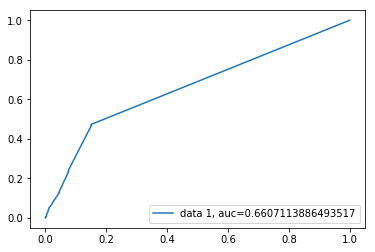

In [15]:
#Baseline Modeling

#Generating scores

#xgb = XGBClassifier(random_state=0)
lr=LogisticRegression(random_state=0)
rf=RandomForestClassifier(random_state=0)


model_list = [lr,rf]

for model in model_list:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    

    clf_score= accuracy_score(y_test,y_pred)

    clf_cm=confusion_matrix(y_test,y_pred)
    print('roc_auc',roc_auc_score(y_test,y_pred))
    clf_cr= classification_report(y_test,y_pred)
    pres=precision_score(y_test,y_pred)
    #print("Hello {0}, your balance is {1}.".format("Adam", 230.2346))
    print('Accuracy score for model :-',clf_score)
    print('confusion matrix for model :-,',clf_cm)
    print('classification report for model :-',clf_cr)
    print('Precision score for model :-',pres)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    print('===='*20)

In [16]:
#LE + Log Tranformation + Scaling

#Data import and Preprocessing
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
X = train_data.drop('Claim',1)
y = train_data['Claim'].copy()
# Creating a dataset with full features for EDA and preprocessing
X_full = X.append(test_data)
X_full.head()
#Drop columns with missing values
X_full = X_full.drop('Gender',1)
test_data = test_data.drop('Gender',1)
X = X.drop('Gender',1)
#ID in test data is needed to submit predictions so we will store it for later
identifiers = test_data['ID'].copy()

#Drop irrelevant features
X = X.drop('ID',1)
X_full = X_full.drop('ID',1)
test_data = test_data.drop('ID',1)

#Recalculating numeric & categorical features
numeric_columns = numeric_features(X_full)
categorical_columns = categorical_features(X_full)

#Datasets
num_col = ['Duration','Net Sales', 'Commision (in value)', 'Age']
categorical_columns=['Agency','Agency Type','Product Name','Destination','Distribution Channel']
X_3 = X.copy()
y_3 = y.copy()

#Since Net Sales & Duration have negative values
for col in num_col:
    if col == 'Net Sales':
        X_3[col] = np.log1p(389+X_3[col])
    elif col == 'Duration':
        X_3[col] = np.log1p(2+X_3[col])
    else:
        X_3[col] = np.log1p(X_3[col])

scaler = StandardScaler()
X_3[num_col]=scaler.fit_transform(X_3[num_col])

#Label Encoding
le = LabelEncoder()
for cols in categorical_columns:
    le.fit(X_full[cols])
    X_3[cols] = le.transform(X_3[cols])



#Train test split
X_train,X_test,y_train, y_test = train_test_split(X_3,y_3,test_size=0.3,random_state=0)
X_3.drop(['Distribution Channel'],1,inplace=True)


In [17]:
X_train.corr()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
Agency,1.000000,0.211552,-0.192291,0.134240,-0.051762,-0.199133,-0.225850,-0.225197,0.145830
Agency Type,0.211552,1.000000,-0.077820,-0.263895,-0.035598,-0.137288,-0.143833,-0.502376,-0.166022
Distribution Channel,-0.192291,-0.077820,1.000000,-0.156800,-0.058497,-0.054663,0.005765,-0.073805,-0.114334
Product Name,0.134240,-0.263895,-0.156800,1.000000,-0.046672,-0.070861,-0.072808,0.549121,0.205760
Duration,-0.051762,-0.035598,-0.058497,-0.046672,1.000000,0.031830,0.403574,0.186767,-0.017856
Destination,-0.199133,-0.137288,-0.054663,-0.070861,0.031830,1.000000,0.056617,-0.022195,-0.037668
Net Sales,-0.225850,-0.143833,0.005765,-0.072808,0.403574,0.056617,1.000000,0.380081,0.033800
Commision (in value),-0.225197,-0.502376,-0.073805,0.549121,0.186767,-0.022195,0.380081,1.000000,0.179460
Age,0.145830,-0.166022,-0.114334,0.205760,-0.017856,-0.037668,0.033800,0.179460,1.000000


In [18]:
X_3.head()

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,6,1,16,-0.974895,56,-0.903865,1.157221,-0.734353
1,7,1,10,1.090060,79,0.662705,-0.821188,-0.214454
2,6,1,16,-0.655410,56,-0.427629,0.901575,2.363214
3,7,1,1,-0.365447,38,-0.422937,-0.821188,-0.624159
4,7,1,10,-0.725777,47,-0.540933,-0.821188,-0.965466


In [19]:
#Model selected for 
def grid_search_gradient_boosting(dataframe,target):
    gbc = GradientBoostingClassifier()
    param_grid = { 
    'learning_rate': [00.5],
    'min_samples_split': [100],
    'min_samples_leaf': [1],
    'max_depth': [6],
    #'n_estimators' : [70,100,120]
    }
    grid_search_model = GridSearchCV(gbc, param_grid=param_grid,scoring = 'precision')
    grid_search_model.fit(dataframe, target)
    
    return grid_search_model.best_params_

smote = SMOTE()
X_train3,y_train3 = smote.fit_sample(X_3,y_3)
print('Best Parameters are:')
print(grid_search_gradient_boosting(X_train3,y_train3))

Best Parameters are:


C:\Users\safik\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.5, 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 100}


In [28]:
#rocaucscore
gbc_grid = GradientBoostingClassifier(learning_rate=0.5,min_samples_split=30,min_samples_leaf=1,max_depth=6,random_state=42)
gbc_grid.fit(X_train3,y_train3)

#precision
#gbc_grid = GradientBoostingClassifier(learning_rate=0.5,min_samples_split=30,min_samples_leaf=1,max_depth=6,random_state=42,n_estimators=100)
#gbc_grid.fit(X_train3,y_train3)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=30,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
#Data import and Preprocessing
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
X = train_data.drop('Claim',1)
y = train_data['Claim'].copy()
#Taking full data for EDA and cleaning
X_full = X.append(test_data)
X_full.head()
#Drop columns with missing values
X_full = X_full.drop('Gender',1)
test_data = test_data.drop('Gender',1)
X = X.drop('Gender',1)
#storing ID
identifiers = test_data['ID'].copy()

#Drop irrelevant features
X = X.drop('ID',1)
X_full = X_full.drop('ID',1)
test_data = test_data.drop('ID',1)



#Datasets
num_col = ['Duration','Net Sales', 'Commision (in value)', 'Age']
categorical_columns=['Agency','Agency Type','Product Name','Destination','Distribution Channel']

X_test_final = test_data.copy()

#Since Net Sales & Duration have negative values
for col in num_col:
    if col == 'Net Sales':
        X_test_final[col] = np.log1p(389+X_test_final[col])
    elif col == 'Duration':
        X_test_final[col] = np.log1p(2+X_test_final[col])
    else:
        X_test_final[col] = np.log1p(X_test_final[col])

scaler = StandardScaler()
X_test_final[num_col]=scaler.fit_transform(X_test_final[num_col])

#Label Encoding
le = LabelEncoder()
for cols in categorical_columns:
    le.fit(X_full[cols])
    X_test_final[cols] = le.transform(X_test_final[cols])
X_test_final.drop(['Distribution Channel'],1,inplace=True)

In [30]:
X_train.skew()

Agency                 -0.152994
Agency Type            -0.997316
Distribution Channel   -7.355150
Product Name            0.342264
Duration                0.468835
Destination            -0.440238
Net Sales               1.663869
Commision (in value)    0.664099
Age                     0.685613
dtype: float64

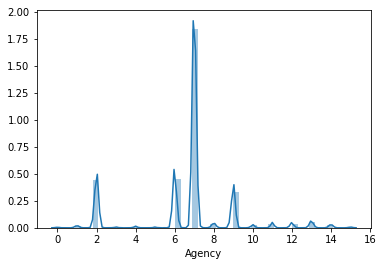

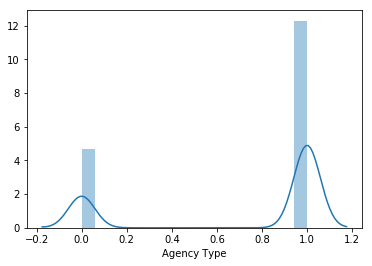

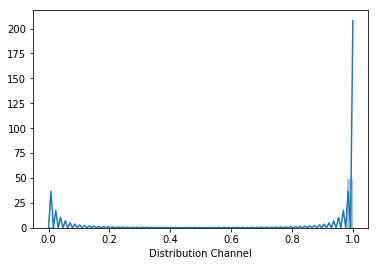

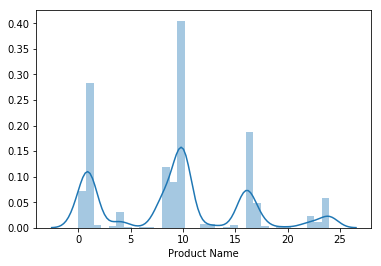

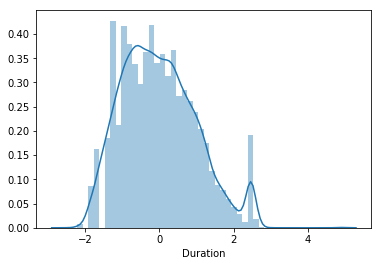

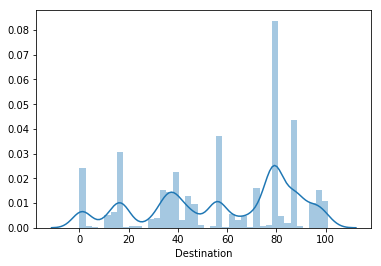

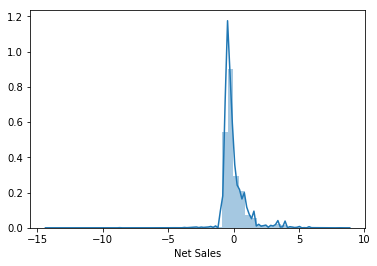

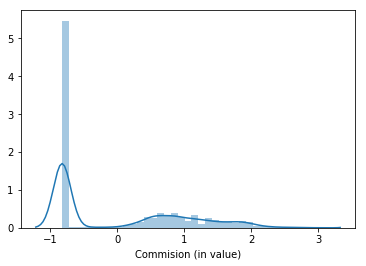

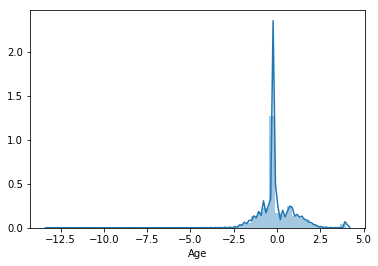

In [31]:
for i in X_train:
    sns.distplot(X_train[i])
    plt.show()

In [32]:
#Predicting the final values from the testing data

In [33]:
y_pred= gbc_grid.predict(X_test_final)

In [34]:
import collections
collections.Counter(y_pred)

Counter({1: 10886, 0: 1775})

In [27]:
final_sub = pd.DataFrame(data={'ID': identifiers,'Claim': y_pred})
final_sub.to_csv(r'C:\Users\safik\Documents\GitHub\hackathon\sample_submission.csv')